## 5-1. 들어가며

### 쏘카에서 해결하고자 하는 것

___

사용자가 쏘카 서비스를 이용해 운행을 하다가(혹은 차량 상태 확인 후) 차량이 고장나거나 소모품의 교체가 필요하다고 생각한 경우 어떤 절차를 거치게 될까요?

사용자는 쏘카의 고객 상담 센터로 고장을 알리고, 상담 센터에서는 수리를 받아야 하는 차량의 수리 요청을 보냅니다. 그러면 고장이 난 차량을 인근 협업 공업사로 보내고 수리를 맡깁니다. 수리를 마친 공업사는 정비 및 수리를 진행한 부분을 메모(기록)로 남기게 됩니다.

이때, 각기 다른 공업사에서 작성하는 용어에서 차이가 발생하게 됩니다. 예를 들어, 차량의 배기구를 `머플러`라고 부르는 것이 정식 명칭이지만, A공업사에서 `마후라`라고 지칭하고, B공업사에서는 `머플러`라고 지칭하는 경우가 생깁니다. 이런 경우 공업사 A, B의 수리 일지를 보고 동일한 부품을 수리하였는지 어떻게 판단해야 할까요? 또, 어떻게 두 단어를 하나의 카테고리로 분류해야 할까요?

두 가지의 수리 결과를 하나의 카테고리로 보지 못하게 된다면 월말 카테고리별 수리 금액을 정산하는 과정에서 예정된 금액과의 차이가 발생합니다. 이 차이를 찾기 위해 카테고리에서 누락된 부분을 인력으로 찾아야 하는 문제가 발생하게 됩니다(그렇게 직원들이 눈 나쁜 거북이가 되어가고...). 이 과정을 줄이기 위해 쏘카에서는 메모를 보고 카테고리를 찾아내는 부분을 자동화 하고자 합니다.

이제 쏘카가 사고비용 정산 금액차 해결 및 직원 건강 증진(!?)을 도모하려고 하는지 알아봅시다.

### 학습 목표

___

-   자연어 처리를 알고 토큰화를 이해한다.
-   토크나이저를 사용하여 토큰화를 할 수 있다.
-   토큰화를 마친 결과를 다양한 방법으로 시각화 할 수 있다.

### 학습 목차

___

1.  자연어처리
2.  데이터 준비
3.  데이터 전처리
4.  단어 빈도 카운팅
5.  Word cloud

### 준비물

___

이번 노드에 사용할 폴더를 생성합니다.

```
$ mkdir -p ~/aiffel/socar_memo/data
```

클라우드 환경에서는 미리 준비된 데이터를 연결해 줍시다. 데이터에 대한 설명은 노드 진행 중에 볼 수 있습니다.

```
$ ln -s ~/data/* ~/aiffel/socar_memo/data
```

## 5-2. 자연어처리

### 자연어와 자연어처리에 대한 정의

___

자연어란 사람들이 일상적으로 사용하는 언어를 일컫는 말로, 인공어와 대비되는 개념이에요. 자연어처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하거나 구현하는 분야입니다. 자연어처리는 사람들의 언어를 연구 대상으로 삼기 때문에, 언어학과 언어 인지 과학과 연관이 깊습니다.

기존에는 규칙 기반 방법과 통계 기반 방법이 주로 좋은 성능을 이끌어 냈지만 딥러닝의 등장으로 분위기가 바뀌며 더 활발한 연구 분야로 자리 잡았습니다. 최근에는 정보 검색, QA 시스템, 문서 분류, 클러스터링, 챗봇 등 다양한 응용이 이루어지고 있어요.

-   [자연어처리](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC)
-   [자연어처리 무엇인가](https://www.aitimes.kr/news/articleView.html?idxno=15036)

Q1. 자연어처리를 이용한 사례는 무엇이 있나요?

예시답안

기계번역, 대화체 질의응답 시스템 대화시스템, 정보검색, QA 시스템, 문서 자동 분류, 신문기사 클러스터링, 대화형 Agent 등

### 한국어 구성 요소

___

한국어는 아래와 같은 요소들로 구성됩니다.

-   음운 : 말의 뜻을 구별해주는 소리의 최소 단위 (ㄱ,ㄴ,ㄷ, ... , ㅏ,ㅑ,ㅓ,...)
    
-   음절 : 독립하여 발음할 수 있는 최소 소리 단위 (가,나,다,...,헿 & 모음은 따로 독립가능)
    
-   형태소 : 뜻을 가진 가장 작은 말의 단위 (단, 자립할 수 있는 어휘형태소만 해당) <명사, 형용사, ...>
    
-   단어 : 자립적으로 쓸 수 있는 말, 조사는 예외 (사과, 기린, 토끼)
    
-   어절 : 문장을 구성하고 있는 각각의 마디로, 대개 띄어쓰기 단위와 일치
    
-   구 : 둘 이상의 단어가 모여 절이나 문장의 일부분을 이루는 문법의 단위 (명사구, 동사구, 형용사구, ...)
    
-   절 : 주어-서술어 관계를 가지고 있으나 독립적으로 사용 불가 (명사절, 형용사절, 부사절)
    
-   문장 : 주어와 서술어를 가지고 있는 완결된 최소의 언어 형식
    

한국어 구성 요소에 대해 [여기](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=seconer&logNo=220766598859)를 참고하세요.

### 한국어 문장 성분

___

한국어 문장이 주어졌을 때 각 요소를 문법적인 역할에 따라 구분해 볼 수도 있습니다. 이렇게 구분하는 경우는 총 일곱 가지 성분으로 나눌 수 있는데요. 각각 주어, 서술어, 보어, 목적어, 부사어, 관형어, 독립어라고 불려요.

이렇게 구분된 성분을 다시 세 가지 큰 그룹으로 묶으면, 주성분, 부속성분, 독립성분으로 나눌 수 있습니다.

주성분은 문장에 없으면 안되는 중요한 성분이라고 볼 수 있고, 부속성분은 문장에서 없어도 되지만 주성분을 수식하는 성분, 독립성분은 다른 요소와 문법적인 관계 없이 독립적으로 역할을 가지는 성분입니다.

-   [한국어의 문장 성분](https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4%EC%9D%98_%EB%AC%B8%EC%9E%A5_%EC%84%B1%EB%B6%84)
-   [한국어의 문장성분: ratsgo](https://ratsgo.github.io/korean%20linguistics/2017/10/01/sentcomp/)

Q2. 한국어 문장 성분을 주성분, 부속성분, 독립성분 나눌 때, 문장 성분을 지워야 할 때 문장의 의미를 최대한 유지하려면 어느 순서로 지우는 것이 좋을까요?

예시답안

독립성분 > 부속성분 > 주성분 순서입니다.

### 자연어처리로 해결할 수 있는 것들

___

**카테고리 분류**

카테고리 분류 문제는 다시 이진 분류 문제와 다중 분류 문제로 나눌 수 있습니다. 이진 분류는 0(거짓) 또는 1(참), 2가지로 분류되는 문제를 의미하고, 다중 분류는 3가지 이상으로 나눠지는 분류를 의미해요. 이러한 방법을 이용해서 문장이 표현하는 감성(카테고리)에 대해 분류하는 기술을 감성(카테고리) 분류라고 합니다.

여러분이 실생활에서 쉽게 접근 가능한 카테고리 분류에는 스팸 이메일 분류기가 있어요. 이메일 주소로 여러 이메일이 도착했을 때, 자동으로 스팸 메일을 분류해 주는 기능을 자연어처리 기술을 활용하여 구현할 수 있습니다. 이메일에 불특정 다수의 특수 문자나 특정 단어가 출현하게 되면 스팸으로 분류하는 기술을 사용하여 분류할 수도 있어요.

-   [텍스트 분류와 감성 분석 구현하기](https://techblog-history-younghunjo1.tistory.com/111)

다른 예로는 위에서 언급한 감성 분류가 있습니다. 감성 분석이라고도 합니다. 문장에 표현된 감정을 이진 혹은 다중으로 분류하는 작업을 통해 긍정/부정 또는 긍정/부정/중립 등으로 나눌 수 있어요. 분류 기준을 꼭 이렇게 긍정/부정으로만 나누지 않고 다양하게 활용할 수도 있습니다. 한국어에서 대표적으로 사용되는 감성 분석 데이터셋은 [네이버 영화평 리뷰셋](https://github.com/e9t/nsmc)이 있습니다.

네이버 영화평을 감성 분석 한다면 아래처럼 나오겠네요.

-   아 더빙.. 진짜 짜증나네요 목소리 - 😡부정
-   액션이 없는데도 재미 있는 몇안되는 영화 - 😍긍정
-   ㅋㅋㅋㅋㅋㅋㅋ - 🤔뭐지?

마지막 ㅋㅋㅋㅋㅋㅋㅋ는 긍정, 또는 부정 둘 중 어느 감성이 맞는 것 같나요?

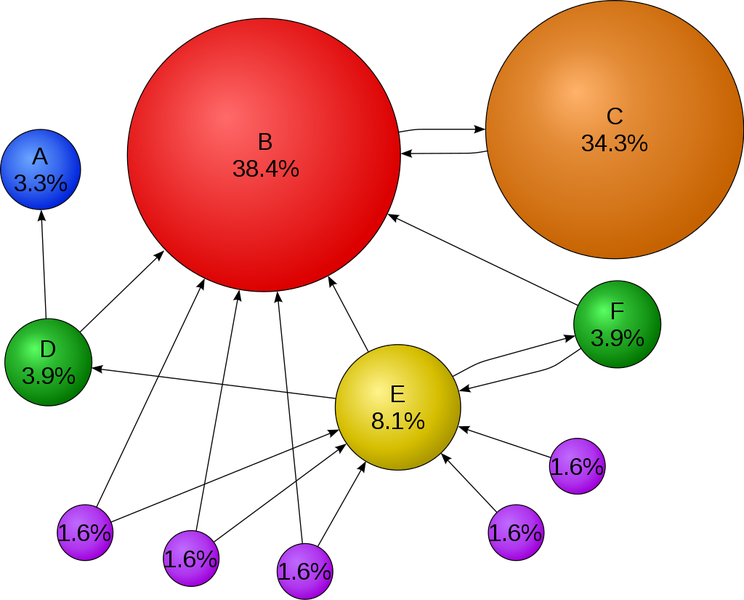

https://en.wikipedia.org/wiki/PageRank

**키워드 추출**

긴 문서에서 빠르게 중요한 정보를 습득하기 위해 키워드나 중요한 문장을 추출하여 읽는다면 효율적일 겁니다. 문서의 단락을 요약하여 표현할 수도 있고, 문장에서 중요한 키워드를 추출하는 방법도 있어요. 키워드 추출에 사용되는 고전적인 방법으로는 TextRank 알고리즘이나 TF-IDF방법이 있겠네요.

TextRank란, word graph나 sentence graph를 구축한 뒤, graph ranking 알고리즘인 PageRank를 이용하여 각각 키워드와 핵심 문장을 선택하는 방법이에요. 이 방법을 적용하여 사용하는 방법과 그에 대한 자세한 설명은 아래 블로그를 참고하세요!

-   [TextRank를 이용한 키워드 추출과 핵심 문장 추출](https://lovit.github.io/nlp/2019/04/30/textrank/)

TF-IDF는 TF(Term-Frequency) + IDF(Inverse Document Frequency)라고 생각할 수 있습니다. TF와 IDF를 종합적으로 사용하는 방법이에요.

TF는 Term Frequency인데, 특정 단어가 한 문서내에 얼마나 자주 등장하는지를 나타내는 값입니다. IDF는 Inverse Document Frequency인데, 특정 단어가 얼마나 적은(Inverse이므로) 문서에서 등장하는지를 나타내는 값입니다. 이 둘을 함께 고려한다는 것은 한 문서에서는 자주 등장하지만 다른 문서에는 잘 나타나지 않는 단어가 문서의 주요 단어일 것이라는 뜻입니다.

-   [TF-IDF](https://wikidocs.net/31698)

[딥러닝 자연어처리](https://www.youtube.com/watch?v=meEchvkdB1U)

## 5-3. 데이터 준비

### 자동차 용어 사전

___

자연어처리 분야에서 각 도메인마다 사용하는 단어는 다릅니다. 포털 사이트의 뉴스 섹션에 들어가 보면, 다양한 뉴스 카테고리가 있지요. 뉴스 카테고리에서 사용되는 단어의 종류 역시 각 카테고리마다 다른 것을 확인할 수 있어요. 경제 카테고리에서는 경제에 관련된 용어가 많이 출현할 것이고, 정치 카테고리에서는 정치, 법 등과 관련된 용어가 많이 출현하게 됩니다. 이렇게 각 도메인마다 사용하는 단어의 차이로 인해, 앞서 언급한 문제에 대한 해결이 명확하지 않습니다.

이를 해결하기 위한 한 가지 방법으로 자동차 용어 사전을 사용할 수 있습니다. 다만 이렇게 도메인에 특화된 데이터(혹은 사전)은 구하기가 어렵고, 수작업으로 특정 도메인에 대한 사전을 구축하였다 해도 이 데이터가 타당한지 신뢰하기 어렵다는 한계가 있어요.

우리는 코트라(kotra)에서 제공하는 자동차 부품 용어집을 사용하겠습니다.

-   [자동차 부품 용어집](http://www.storrskoreanchurch.org/wp-content/uploads/2012/02/%EC%9E%90%EB%8F%99%EC%B0%A8-%EB%B6%80%ED%92%88-%EC%9A%A9%EC%96%B4%EC%A7%91.pdf)

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-4-l-2-1.max-800x600.png)

\[http://www.storrskoreanchurch.org/wp-content/uploads/2012/02/%EC%9E%90%EB%8F%99%EC%B0%A8-%EB%B6%80%ED%92%88-%EC%9A%A9%EC%96%B4%EC%A7%91.pdf\]

위 링크의 데이터 중 필요한 것만 추려 따로 파일에 저장해 두었습니다. 미리 준비한 파일 중 `carDic.txt`가 해당 파일입니다.

파일에 어떤 내용이 있는지 확인해 볼게요!

In [ ]:
!head ~/aiffel/socar_memo/data/KCC150_100k.txt

총 단어의 개수는 1,849개 입니다. 중복된 단어가 포함되어 있고, 중복 제거한 자동차 단어는 1,433개 입니다. 데이터에는 공백 문자가 포함된 경우가 있어요. 단어가 `픽업 트럭`과 같이 단어에 공백 문자가 포함된 경우 `픽업트럭`처럼 공백을 제외한 단어도 들어 있을 수 있습니다.

### 뉴스 데이터

___

자동차 도메인 데이터를 이용하기 전에 뉴스 기사로 되어 있는 말뭉치를 이용해 볼게요. 사용할 뉴스 데이터는 `KCC150`인데요. 이 데이터는 [여기](http://nlp.kookmin.ac.kr/kcc/)에서 다운로드 할 수 있습니다. KCC150 데이터는 뉴스 기사를 크롤링하여 구축된 파일입니다. 이 파일의 문장 개수는 11,961,347개이고, 단어(어절)의 개수는 150,705,457개 입니다. 대용량 말뭉치를 분석하는데 시간이 많이 소요되니, 이 말뭉치에서 100,000개의 문장을 끊어서 저장한 파일을 `KCC150_100k.txt`에 저장해 두었습니다.

In [ ]:
!head ~/aiffel/socar_memo/data/KCC150_100k.txt

## 5-4. 데이터 전처리

### 형태소 분석 및 불용어 제거

___

> 나는 학교에 갑니다. 친구를 학교에서 만나기로 했습니다.

위 예시 문장에 어절 단위 분절을 사용하게 되면 불필요한 요소들이 포함되는 것을 확인할 수 있습니다. 특히 단어에 조사가 붙어 나오는 경우를 볼 수 있죠. 위의 문장에서는 `학교에`, `학교에서`는 조사를 제외하게 되면 하나의 단어 `학교`로 만들 수 있습니다. 전체 사전의 크기도 이만큼 줄어들게 되겠죠. 이렇게 문장에서 많이 사용되어 특별한 의미를 가지지 않는 단어(조사, 자주 등장하는 단어 등)에 대해 미리 처리하여 사용하는 과정이 필요한데요. 이를 전처리라고 부릅니다. 전처리에는 다양한 기법이 있지만 여기서는 토큰화(Tokenizing)와 불용어(stopword) 제거에 대하여 알아보도록 하겠습니다.

### 토큰화란?

___

문장을 일정한 단위로 나누는 작업을 토큰화(Tokenizing)라고 합니다. 이러한 작업을 해주는 것을 토크나이저(Tokenizer)라고 불러요. 토큰의 종류는 다양하게 정의할 수 있고, 사용하고자 하는 작업의 특성에 따라 변경할 수 있어요. 주로 영어권에서는 토큰의 기준으로 단어(word)를 사용하지만, 한국어에서는 단어보단 형태소를 기준으로 하는 경우가 많아요. 이외에도 음절, subword 등으로도 토큰화를 할 수 있어요.

### 형태소 분석

___

한국어는 영어와 다르게 교착어이므로 어절은 단어에 조사, 접사, 어미, 어간의 의존 형태소의 결합으로 이루어져요. 이런 특징으로 인해 단어 `학교`에서 파생되는 어절은 `학교에`, `학교에서`, `학교를`, `학교로` 등과 같이 매우 많게 되요. 그래서 한국어에서는 형태소 단위로 분절하는 방법을 주로 사용합니다.

문장을 형태소 단위로 분절해 주는 것을 형태소 분석기라고 부르는데요. 형태소 분석기로 문장 `나는 학교로 친구와 갑니다.`를 분석한다면, `나`, `는`, `학교`, `로`, `친구`, `와`, `가`, `ㅂ니다`, `.`로 분리할 수 있어요. 경우에 따라 문장 기호도 별도의 토큰으로 분리하거나 그 앞의 토큰에 부착하기도 해요. 방금 예시에서는 분리한 경우이겠죠?

이렇게 한국어 문장을 형태소 단위로 토큰화 한다면, 불필요한 부분을 어절에서 떼어낼 수 있고, 이는 곧 딥러닝에서 사전 크기를 축소시키는 방향으로 나갈 수 있어요. 사전의 크기를 축소시키는 작업은 매우 중요한 작업입니다.

형태소 분석기로 사용하는 대표적인 한국어 분석 패키지로는 `KoNLPy`가 있어요. `KoNLPy`는 5개 형태소 분석기를 포함하는데, `Mecab`, `Kkma`, `Komoran`, `Hannanum`, `Okt`가 있어요. 우리는 `Komoran`을 사용해 진행할 거예요!

-   [KoNLPy](https://konlpy.org/en/latest/)
-   [Komoran](https://konlpy.org/en/latest/api/konlpy.tag/#module-konlpy.tag._komoran)

### 품사판별 VS 형태소

___

한국어는 5언 9품사를 가져요. 5언에는 체언(명사, 대명사, 수사), 용언(형용사, 동사), 수식언(관형사, 부사), 관계언(조사), 독립언(감탄사)이 해당되고, 9품사에는 괄호에 들어간 명사, 대명사, 수사, 형용사, 동사, 관형사, 부사, 조사, 감탄사가 해당돼요. 여기서 용언(형용사, 동사)를 제외한 7품사는 그 자체로 형태소예요.

용언은 형태소인 어간과 어미로 구성되어 있어요. 예를 들어 어절 `예쁜`은 `예쁘`(어간) + `ㄴ`(어미)로 구성돼요. 만약 문장 `너무너무너무는 아이오아이의 노래입니다`를 `너무너무너무`(명사) + `는`(조사) + `아이오아이`(명사) + `의`(조사) + `노래`(명사) + `입니다`(형용사)로 출력된다면 품사판별에 속해요. 하지만 `너무너무너무`(명사) + `는`(조사) + `아이오아이`(명사) + `의`(조사) + `노래`(명사) + `이`(어간) + `ㅂ니다`(어미)로 출력된다면 바로 형태소 분석에 속하죠!

### 명사 추출

___

형태소 분석을 마친 문장에는 형태소에 대한 품사 태그가 같이 부착되어 있어요. 이 형태소 태그를 기준으로 사용자가 원하는 형태소를 선택해서 별도로 추릴 수 있죠. 이때, 주로 선택되는 형태소가 명사, 동사, 형용사인데, 동사나 형용사는 어간이 떨어져서 나오는 경우 원형복원을 하는 과정까지도 포함되기에 약간 복잡한 과정을 거칩니다. 이런 이유로 우리는 명사만 추출해서 사용해 볼게요.

문장에서 명사를 추출할 수 있도록 코드를 준비해 볼까요?

먼저 필요한 라이브러리를 준비하세요.

In [ ]:
sample_sent = '이 물건은 우리가 가지고 있는 것들 이다.'
sample_token = komoran.morphs(sample_sent)

output_token = []
for token in sample_token:
    if token not in korean_stopword:
        output_token.append(token)

print(output_token)

준비해 두었던 뉴스 기사 데이터 `KCC150_100k.txt`에서 10줄만 출력해 볼게요.

In [ ]:
#print Noun in sentence
#only 10 sentences

komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

for idx, line in enumerate(news_lines):
    morph_result = komoran.pos(line) #형태소 분석
    if idx == 10:
        break
    print(line)
    for word, tag in morph_result:
        if tag.startswith('NN'): #komoran은 NNP,NNG 가 명사
            print(word, end=' ')

    print('\n') #next line

news.close()

### 불용어를 제거해보자

___

앞서 언급한 바와 같이 말뭉치에는 자주 등장하지만, 유의미하지 않은 단어(조사, 의존형태소)가 자주 등장하는 것을 확인할 수 있어요. 이와 같이 가지고 있는 데이터에서 유의미한 데이터만 남기고 싶은 경우에 사용하는 방법이 불용어 제거 입니다. 한국어 불용어는 `나`(NP), `있`(VA), `이`(NP), `지금`(NNG) 등이 있어요. 이 단어들은 문장에서 자주 등장하지만 실제 의미 분석에 있어서는 거의 기여하지 않는 단어들이기 때문에 제거하여 사용해요. 영어는 `nltk` 패키지 내에서 영어 불용어를 미리 정의해 두었기 때문에 쉽게 불용어를 제거할 수 있지만, 한국어는 그렇지 못하기 때문에 미리 정의된 사전 데이터를 사용해서 불용어를 제거합니다. 다만, 이 불용어 사전이 좋은 결과를 보장하지는 않습니다.

-   [한국어 불용어 리스트 100개](https://bab2min.tistory.com/544)

미리 준비해둔 파일 중에 `korean_stopword.txt` 파일에 한국어 불용어가 들어 있습니다.

In [ ]:
stopword_file = open(PATH+"/korean_stopword.txt",'r')
stopword_lines = stopword_file.read().splitlines()

korean_stopword = [line.split()[0] for line in stopword_lines]
print(len(korean_stopword))
stopword_file.close()
print(korean_stopword)

In [ ]:
한번 테스트를 해볼까요?

In [ ]:
sample_sent = '이 물건은 우리가 가지고 있는 것들 이다.'
sample_token = komoran.morphs(sample_sent)

output_token = []
for token in sample_token:
    if token not in korean_stopword:
        output_token.append(token)

print(output_token)

### Subword Tokenizer

___

문장을 보다 작은 단위로 분절할 때 공백(띄어쓰기)을 기준으로 분절하기도 합니다. 하지만 중국어나 일본어와 같이 띄어쓰기를 하지 않는 언어에서는 공백을 기준으로 분절하기 어렵습니다. 이를 해결하기 위해 Subword Tokenizer를 사용하기도 합니다. Subword Tokenizer는 '빈도가 잦은 단어는 유지하고, 저 빈도의 단어는 의미 있는 단위로 분절한다'는 원칙을 기반으로 해요. 이런 특징 덕분에 한국어와 같은 교착어에서 유용한 부분이 있습니다.

예를 들어 `학교에`, `학교를`, `학교가`와 같이 `학교`에 조사가 붙어 총 10개의 vocab을 가진다고 가정해 볼게요. 이때 `학교`에 붙은 조사를 떼어낼 수 있다면 전체 말뭉치에서 vocab의 크기는 엄청나게 작아질 수 있습니다.

형태소 분석기와 동일해 보이지만 Subword Tokenizer는 사전에 언어학적인 지식 없이 말뭉치에서 나타난 단어들의 경향(확률)을 보고 단어를 분절한다는 점이 차이가 있어요.

대표적인 Subword Tokenizer로는 BPE(Byte Pair Encoding), WordPiece, Unigram, SentencePiece 등이 있습니다.

-   [BPE](https://arxiv.org/pdf/1508.07909.pdf)
-   [WordPiece](https://arxiv.org/abs/1609.08144v2)
-   [Unigram](https://arxiv.org/abs/1804.10959)
-   [SentencePiece](https://arxiv.org/abs/1808.06226)

## 5-5. 단어 빈도 카운팅

### 전체 단어 빈도 카운팅

___

뉴스 기사 말뭉치 파일을 읽고, 형태소 분석기를 활용해서 형태소 분석을 진행해 보도록 하겠습니다.

In [ ]:
#파일에서 단어 기준으로 빈도를 카운팅
#Counter 함수를 불러서 사용

word_count = Counter()
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

for line in news_lines:
    word_count.update(komoran.morphs(line))

print(len(word_count)) #전체 단어 개수 출력
print(word_count.most_common(10)) #빈도 상위 10개 출력
news.close()

### 뉴스 데이터에서 출현한 자동차 단어 빈도 카운팅

___

이번에는 앞서 확인한 자동차 용어 사전을 사용해서 빈도 카운팅을 진행해 봅시다. 아래 코드에서는 `픽업 트럭`과 같이 자동차 용어 사전에 공백이 포함되는 경우를 고려하지 않으며, 오직 한 개의 어절로 이루어진 경우만 다루겠습니다.

입력으로 들어가는 데이터는 위와 동일하게 뉴스 기사 말뭉치로 할게요. 조금 시간이 걸립니다.

In [ ]:
#파일에서 단어 기준으로 빈도 카운팅
#뉴스 기사에서 자동차 단어 찾기

car_count = Counter()
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

car_file = open(PATH+"/carDic.txt", 'r')
car_words_list = car_file.read().split('\n')

for line in news_lines:
    line = line.split() #문장 to 단어
    car_count.update([word for word in line if word in car_words_list])

print(len(car_count)) #전체 단어 개수 출력
print(car_count.most_common(10)) #빈도 상위 10개 출력
news.close()
car_file.close()

두 결과 모두 형태소 분석을 기본으로 하고, 각각 가장 많이 나온 10개 단어를 출력해 보았습니다. 첫 번째 결과는 조사와 의존형용사가 가장 높은 빈도를 차지했습니다. 두 번째 결과는 너무도 당연하게 자동차에 관련된 단어가 높은 순위를 차지합니다.

하지만, 단어를 확인한 데이터의 도메인이 뉴스 기사이다보니, 자동차 단어의 빈도가 첫 번째 결과와 비교해서 현저하게 낮음을 확인할 수 있습니다.

이제 자동차 사전의 도움으로 자동차 단어를 어떻게 추리면 좋을지 한 걸음 더 들어가보죠!

## 5-6. Word cloud

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-4-l-5-2.max-800x600.png)

### Word cloud란?

___

Word cloud란 데이터에서 얻어진 태그(혹은 단어)들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표현하는 것입니다. 보통은 2차원의 표와 같은 형태로 태그들이 배치되고 알파벳/가나다 순으로 나타나죠. 시각적인 중요도 강조를 위해 각 태그들의 중요도(혹은 인기도)에 따라 글자의 색상이나 굵기 등 형태를 바꾸기도 해요.

종합하면, 중요한 단어나 키워드를 직관적으로 보여주는 시각화 도구입니다.

-   [태그 클라우드(워드 클라우드)](https://ko.wikipedia.org/wiki/%ED%83%9C%EA%B7%B8_%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C)

### 전체 데이터를 Word cloud로 표현하기

___

앞서 형태소 단위로 토큰화한 데이터를 토대로 Word cloud를 만들어 보겠습니다. Word cloud를 만들기 위해서는 `wordcloud` 패키지와 이를 그려주는 `matplotlib` 패키지를 사용합니다. Word cloud의 입력 데이터가 형태가 하나의 문자열로 이루어 진다는 점을 고려하면, 패키지 내에서 자동으로 공백을 기준으로 분절함을 유추할 수 있습니다. `matplotlib`의 옵션을 이용하면 그려질 Word cloud의 크기를 지정하고, 축을 지우거나 색상을 변경할 수 있습니다. 자세한 옵션은 다음을 참고하세요

-   [Word cloud](https://github.com/amueller/word_cloud)
-   [matplotlib](https://matplotlib.org/)

In [ ]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(news_lines))

# Plot wordcloud
plt.figure(figsize=(10,8)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

![content img](https://d3s0tskafalll9.cloudfront.net/media/original_images/so-4-l-5-1.png)

전 이런 결과를 얻었습니다!

그려진 결과를 보니 가장 크기가 큰 단어가 `있는`, `있다`, `대한` 등이네요. 하지만 이런 단어들은 중요한 의미를 가진다고 보기는 어려운 것 같아요. 이를 해결하기 위해 앞에서 배웠던 명사만 추리는 코드를 사용해 보도록 하겠습니다.

우선 형태소 분석된 결과에서 명사만 찾아 `noun_sent_list`를 만들어 볼게요!

In [ ]:
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

noun_sent_list = []

for idx, line in enumerate(news_lines):
    morph_result = komoran.pos(line) #형태소 분석
  
    noun_sent = ''
  
    for word, tag in morph_result:
        if tag.startswith('NN'): #komoran은 NNP,NNG 가 명사
            noun_sent += word

    noun_sent_list.append(noun_sent)

print(len(noun_sent_list))
news.close()

이제 만들어진 `noun_sent_list`를 시각화 해볼게요!

In [ ]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(noun_sent_list))

# Plot wordcloud
plt.figure(figsize=(10,8)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

어떤가요? 신문 기사의 주요 단어가 눈에 보이시나요?

### 자동차 단어만 Word cloud로 표현하기

___

뉴스 기사에서 자동차 단어를 추리는 방법으로 자동차 사전을 사용하였습니다. 앞서 사용한 방법을 토대로 뉴스 기사에서 자동차 관련 단어만 추려보고, 이를 Word cloud로 표현해 보도록 할게요. 여기서도 앞에서 언급한 것처럼 한 개의 어절로 이루어진 자동차 단어만 다룹니다.

우선 자동차 관련 단어만 골라 `car_sent_list`에 담습니다.

In [ ]:
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

car_file = open(PATH+"/carDic.txt", 'r')
car_words_list = car_file.read().split('\n')

car_sent_list = []

for line in news_lines:
    line = line.split() #문장 to 단어
    car_sent_list.append(' '.join([word for word in line if word in car_words_list]))

print(len(car_sent_list))
news.close()
car_file.close()

이제 시각화 해봅시다!

In [ ]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(car_sent_list))

# Plot wordcloud
plt.figure(figsize=(10,8)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

확실히 다른 결과가 보이네요!!

## 5-7. 다음을 위한 준비

### 다음 시간에...

___

이번 노드에서는 말뭉치로부터 형태소 분석까지 이르는 과정을 탐험해 봤는데요.

이 과정은 기초적이지만 매우 중요한 과정입니다. 형태소 분석을 어떻게 하느냐, 토큰화를 어떤 방식으로 진행하느냐에 따라 모델의 결과에 엄청난 결과를 미칩니다.

앞으로 토큰화된 결과를 이용해서 쏘카가 원하는 카테고리 분류 작업을 진행하게 될텐데요. 그 전에 이 토큰화 방식이 어떻게 진행되는지, 토큰화 방식에 어떤 종류가 있는지 알아보는 것이 중요합니다.

노드에서 언급만 하고 지나간 토큰화 방식에 대해서도 많이 찾아보고 공부할 수록 다음 노드를 이해하는데 도움이 될 것입니다. 더 나아가 응용까지 가능하겠죠?

그럼 오늘은 여기까지! 다음에 봐요 빠잉~!

In [4]:
pip list

Package                       Version
----------------------------- ------------------
absl-py                       0.15.0
aiohttp                       3.8.1
aiosignal                     1.2.0
albumentations                1.1.0
antlr4-python3-runtime        4.8
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
attrs                         21.4.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.6.0
black                         22.1.0
bleach                        4.1.0
branca                        0.4.2
brotlipy                      0.7.0
cachetools                    5.0.0
certifi                       2021.10.8
cffi                          1.15.0
charde

scipy                         1.7.1
seaborn                       0.11.2
selenium                      4.0.0
Send2Trash                    1.8.0
sentencepiece                 0.1.96
setuptools                    60.9.3
sgmllib3k                     1.0.0
Shapely                       1.7.1
simpervisor                   0.4
six                           1.16.0
smart-open                    5.2.1
sniffio                       1.2.0
sortedcontainers              2.4.0
SoundFile                     0.10.3.post1
soupsieve                     2.3.1
soynlp                        0.0.493
stack-data                    0.2.0
statistics                    1.0.3.5
statsmodels                   0.13.0
summa                         1.2.0
tabulate                      0.8.9
tensorboard                   2.8.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.6.0
tensorflow-addons             0.14.0
tensorflow-datasets           4.4.0
tensorflow-es